### Getting Started With ML Project With MLFLOW

- Installing MLflow.

- Starting a local MLflow Tracking Server.

- Logging and registering a model with MLflow.

- Loading a logged model for inference using MLflow’s pyfunc flavor.

- Viewing the experiment results in the MLflow UI.

### Import packages

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Load and preprocess the input

In [ ]:
# Load the Titanic dataset using Seaborn
titanic = sns.load_dataset('titanic')

# Drop rows with missing target and features
titanic = titanic.dropna(subset=['age', 'embarked', 'sex', 'class', 'fare', 'who', 'alone', 'survived'])

# Define features (X) and target (y)
X = titanic[['age', 'fare', 'class', 'sex', 'embarked', 'who', 'alone']]
y = titanic['survived']

# Convert categorical features to numeric using Label Encoding
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Train the Model

In [ ]:

params = {
    "n_estimators": 100,
    "max_depth": None,
    "min_samples_split": 2,
    "random_state": 42
}


# Train a Random Forest Classifier
model = RandomForestClassifier(**params)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print("Titanic Prediction Model is trained")

Titanic Prediction Model is trained


 ### Evaluate the Model

Accuracy: 0.7622377622377622


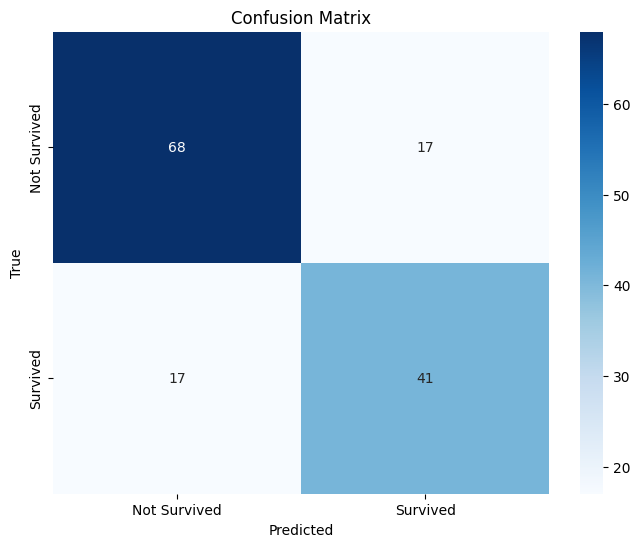

In [8]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize and save the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()

### Track the experiment with MLFlow

In [10]:
### MLFLOW tracking
mlflow.set_tracking_uri(uri="http://127.0.0.1:5001")
mlflow.set_experiment("Titanic Survivor Model Experiment")

# Start an MLflow run
with mlflow.start_run():
    # Train a Random Forest Classifier
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    # Log parameters, metrics, and the model
    mlflow.log_params(params)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(model, "random_forest_model")

    # Log the confusion matrix image
    mlflow.log_artifact("confusion_matrix.png")

# End MLflow run
mlflow.end_run()


    

2025/01/09 12:31:47 INFO mlflow.tracking.fluent: Experiment with name 'Titanic Survivor Model Experiment' does not exist. Creating a new experiment.
2025/01/09 12:31:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run secretive-skink-260 at: http://127.0.0.1:5001/#/experiments/324999239046033583/runs/d01a7ca7867e43169a2d21693b4b89bb
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/324999239046033583


### Retrain the model with different params

In [ ]:
params = {
    "n_estimators": 200,
    "max_depth": 10,
    "min_samples_split": 5,
    "random_state": 42
}


# Train a Random Forest Classifier
model = RandomForestClassifier(**params)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print("Titanic Prediction Model is trained")

Titanic Prediction Model is trained


## Evaluate the Model Again

Accuracy: 0.7412587412587412


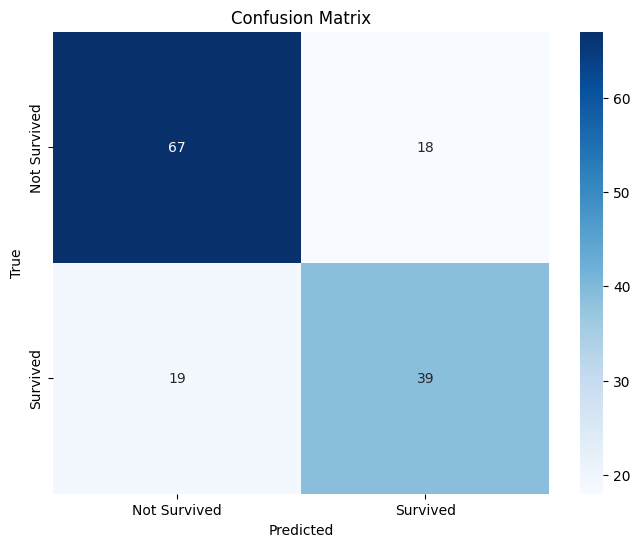

In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize and save the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()

## Track the new experiment

In [13]:
### MLFLOW tracking
mlflow.set_tracking_uri(uri="http://127.0.0.1:5001")
mlflow.set_experiment("Titanic Survivor Model Experiment")

# Start an MLflow run
with mlflow.start_run():
    # Train a Random Forest Classifier
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    # Log parameters, metrics, and the model
    mlflow.log_params(params)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(model, "random_forest_model")

    # Log the confusion matrix image
    mlflow.log_artifact("confusion_matrix.png")

# End MLflow run
mlflow.end_run()


    

2025/01/09 12:32:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run redolent-grub-743 at: http://127.0.0.1:5001/#/experiments/324999239046033583/runs/3e844b3ce2e94fdcb3b5b364797646e5
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/324999239046033583
